<a href="https://colab.research.google.com/github/coder178/ML_Sem6/blob/main/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

columns = ["sentiment","id","date","query","user_id","text"]
df = pd.read_csv("/content/drive/MyDrive/datasets/tweeter.csv",encoding="latin",names=columns)
df.head()
df["sentiment"] = df["sentiment"].replace(4,1)

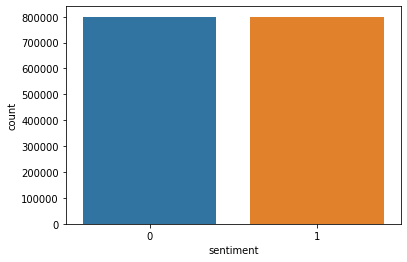

In [ ]:
import seaborn as sns
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

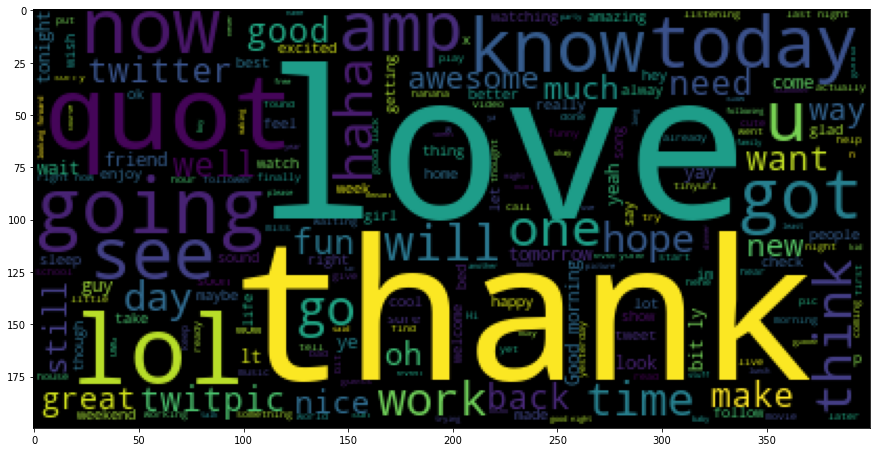

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment']==1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
# print(positive_tweets_string)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))


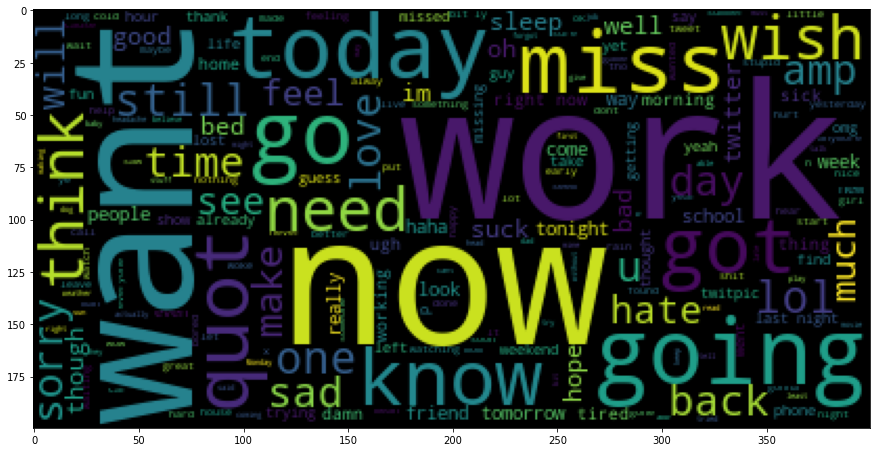

In [ ]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment']==0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))


In [ ]:
#removing stopwords,urls from the dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
# remove hyperlinks
positive_tweets_string = re.sub(r'https?:\/\/.*[\r\n]*', '', positive_tweets_string)
# remove hashtags
# only removing the hash # sign from the word
positive_tweets_string = re.sub(r'#', '', positive_tweets_string)
print(positive_tweets_string)

I LOVE @Health4UandPets u guys r the best!!  im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!! @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.  Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup @LovesBrooklyn2 he has that effect on everyone  @ProductOfFear You can tell him that I just burst out laughing really loud because of that  Thanks for making me come out of my sulk! @r_keith_hill Thans for your response. Ihad already find this answer  @KeepinUpWKris I am so jealous, hope you had a great time in vegas! how did you like the ACM's?! LOVE YOUR SHOW!!  @tommcfly ah, congrats mr fletcher for finally joining twitter  @e4VoIP I RESPONDED  Stupid cat is helping me type. Forgive errors  crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told me too! ha. happy birthday JB!  @naughtyhau

In [ ]:

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')
# print('Stop words\n')
# print(stopwords_english)
positive_tweets_clean=[]

#Tokenize the string
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)
# tokenize tweets
positive_tweet_tokens = tokenizer.tokenize(positive_tweets_string)
print()
print('Tokenized string:')
print(positive_tweet_tokens[:30])
for word in positive_tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation) :
      positive_tweets_clean.append(word)
print('Removed stopwords')
print(positive_tweets_clean[:30])



Tokenized string:
['i', 'love', '@health4uandpets', 'u', 'guys', 'r', 'the', 'best', '!', '!', 'im', 'meeting', 'up', 'with', 'one', 'of', 'my', 'besties', 'tonight', '!', 'cant', 'wait', '!', '!', '-', 'girl', 'talk', '!', '!', '@darealsunisakim']
Removed stopwords
['love', '@health4uandpets', 'u', 'guys', 'r', 'best', 'im', 'meeting', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk', '@darealsunisakim', 'thanks', 'twitter', 'add', 'sunisa', 'got', 'meet', 'hin', 'show', 'dc', 'area', 'sweetheart', 'sick', 'really', 'cheap']


#Data Preprocessing

In [ ]:
#Selecting the text and Sentiment column for our further analysis
data=df[['text','sentiment']]
data

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [ ]:
#: Separating positive and negative tweets
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]

In [ ]:
#Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [ ]:
#Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset

,text,sentiment
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1
...,...,...
799995,sick spending my day laying in bed listening ...,0
799996,gmail is down?,0
799997,rest in peace farrah! so sad,0
799998,@eric_urbane sounds like a rival is flagging y...,0


In [ ]:
#Cleaning and removing the above stop words list from the tweet text
stopwordlist = stopwords.words('english')
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)#removes punctuation
    return text.translate(translator)

dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

dataset['text'] = dataset['text'].apply(lambda x: re.sub('((www.[^s]+)|(https?://[^s]+))',' ',x))

dataset

,text,sentiment
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1
...,...,...
799995,sick spending day laying bed listening taylors...,0
799996,gmail down,0
799997,rest peace farrah sad,0
799998,ericurbane sounds like rival flagging ads much...,0


In [ ]:
#Getting tokenization of tweet text
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000          [love, health, 4uandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                 [lovesbrooklyn, 2, effect, everyone]
Name: text, dtype: object

In [ ]:
#Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data ]
    return data
dataset['text']= dataset['text'].apply(lambda x:stemming_on_text(x))
dataset['text'].head()

800000          [love, health, 4uandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                 [lovesbrooklyn, 2, effect, everyone]
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Applying Lemmatizer
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return data
dataset['text'] = dataset['text'].apply(lambda x:lemmatizer_on_text(x))
dataset['text'].head()

800000          [love, health, 4uandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                 [lovesbrooklyn, 2, effect, everyone]
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a Vectorizer Object
vectorizer = CountVectorizer()
# for d in range(len(data['text'])):
#   vectorizer.fit(dataset['text'][d])
def convert_string(s):
  str = ""
  for e in s:
    str+=e
  return str
  
dataset['text'] = dataset['text'].apply(lambda text: convert_string(text))

vectorizer.fit(dataset['text'])

# Printing the identified Unique words along with their indices
# from itertools import islice

# def take(n, iterable):
#     """Return the first n items of the iterable as a list."""
#     return list(islice(n,iterable))
# a = take(vectorizer.vocabulary_,10)
# print(a)
# print("Vocabulary: ", list(vectorizer.vocabulary_.values)[1:10])
# Encode the Document
vector = vectorizer.transform(dataset['text'])

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)


NameError: ignored